<a href="https://colab.research.google.com/github/shashankt1/Loan-Approval-Prediction/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score
from sklearn.model_selection import train_test_split

In [137]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [138]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [139]:
df.shape

(614, 13)

In [140]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [141]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [142]:
df.dropna(inplace=True)

In [143]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [144]:
#label Encoding
df.replace({"Loan_Status":{'N':0, 'Y':1}}, inplace=True)

In [145]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [146]:
df= df.replace(to_replace='3+', value=4)

In [147]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
4,41


<Axes: xlabel='Education', ylabel='count'>

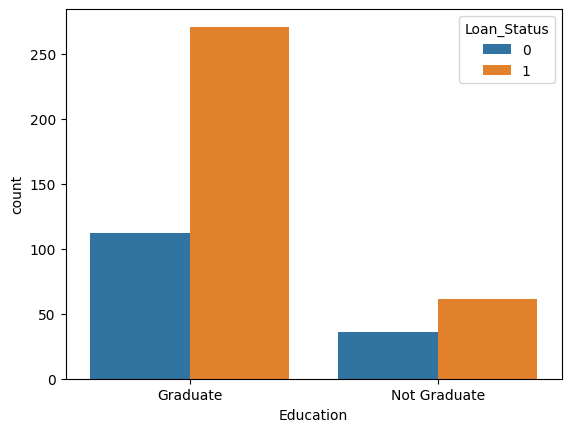

In [148]:
sns.countplot(x='Education', hue='Loan_Status', data=df)

<Axes: xlabel='Married', ylabel='count'>

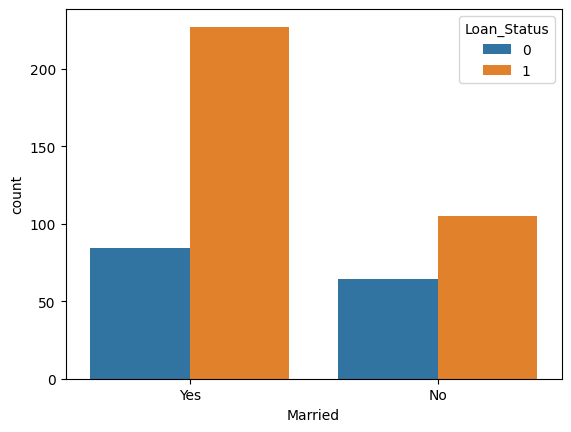

In [149]:
sns.countplot(x='Married', hue='Loan_Status', data=df)

In [150]:
replacement_dict = {
    "Married": {'No': 0, 'Yes': 1},
    "Gender": {'male': 0, 'female': 1},
    "Education": {'Not Graduate': 0, 'Graduate': 1},
    "Self_Employed": {'No': 0, 'Yes': 1},
    "Property_Area": {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    "Dependents": {'0': 0, '1': 1, '2': 2, '3+': 3}
}
df.replace(replacement_dict, inplace=True)

In [151]:
replacement_dict

{'Married': {'No': 0, 'Yes': 1},
 'Gender': {'male': 0, 'female': 1},
 'Education': {'Not Graduate': 0, 'Graduate': 1},
 'Self_Employed': {'No': 0, 'Yes': 1},
 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
 'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 3}}

In [152]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,Male,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,Male,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,Male,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,Male,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [153]:
import plotly.express as px
fig = px.scatter(df, x='ApplicantIncome', y='CoapplicantIncome', color='Loan_Status',
                 title='Scatter Plot of ApplicantIncome vs CoapplicantIncome')
fig.show()

In [154]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [155]:
print(df['Dependents'].dtype)
print(df['Dependents'].head())

int64
1    1
2    0
3    0
4    0
5    2
Name: Dependents, dtype: int64


In [156]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [157]:
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [158]:
df['Loan_Status'] = (df['Loan_Status'] == 1).astype(int)

In [159]:
print("Shape of X before splitting:", X.shape)
print("Shape of y before splitting:", y.shape)

Shape of X before splitting: (480, 11)
Shape of y before splitting: (480,)


In [160]:
X.dropna(inplace=True)
y = y[X.index]

In [161]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (480, 11)
Shape of y: (480,)


In [162]:
print(df.head())
print(df.dtypes)

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1  LP001003       1        1           1          1              0   
2  LP001005       1        1           0          1              1   
3  LP001006       1        1           0          0              0   
4  LP001008       1        0           0          1              0   
5  LP001011       1        1           2          1              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
1             1.0              0            0  
2             1.0              2            1  
3       

In [163]:
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = df['Loan_Status']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [167]:
y_pred = model.predict(X_test)

In [168]:
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [169]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [170]:
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8229
Confusion Matrix:
[[14 14]
 [ 3 65]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        28
           1       0.82      0.96      0.88        68

    accuracy                           0.82        96
   macro avg       0.82      0.73      0.75        96
weighted avg       0.82      0.82      0.81        96



In [171]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model.predict_proba(X_test)[:, 1]

In [172]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [173]:
auc = roc_auc_score(y_test, y_prob)

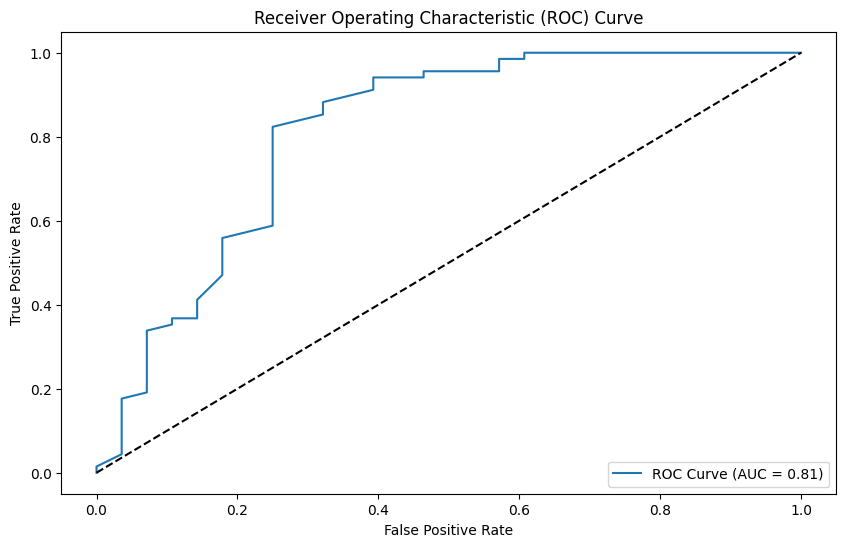

In [174]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [175]:
def rejection_reasons(row):
    reasons = []

    if row['ApplicantIncome'] < 3000:
        reasons.append("Low Applicant Income")
    if row['LoanAmount'] > 0.5 * row['ApplicantIncome']:
        reasons.append("Loan Amount too High relative to Income")
    if row['Credit_History'] == 0:
        reasons.append("No Credit History")
    if row['Loan_Amount_Term'] < 360:
        reasons.append("Loan Term is too short")

    return ', '.join(reasons) if reasons else "N/A"

In [176]:
df['Rejection_Reasons'] = df.apply(lambda row: rejection_reasons(row) if row['Loan_Status'] == 0 else "Approved", axis=1)

In [177]:
rejected_df = df[df['Loan_Status'] == 0]

In [178]:
rejection_counts = rejected_df['Rejection_Reasons'].value_counts().reset_index()
rejection_counts.columns = ['Rejection Reasons', 'Count']

In [179]:
fig = px.bar(rejection_counts,
              x='Rejection Reasons',
              y='Count',
              title='Reasons for Loan Rejections',
              labels={'Count': 'Number of Rejections'},
              color='Count',
              text='Count')


fig.update_traces(texttemplate='%{text}', textposition='outside')


fig.update_layout(xaxis_title='Rejection Reasons',
                  yaxis_title='Number of Rejections',
                  xaxis_tickangle=-45)


fig.show()

In [180]:
output_file_path = 'loan_approval_predictions.csv'
df.to_csv(output_file_path, index=False)

print(f"Predictions saved to {output_file_path}")

Predictions saved to loan_approval_predictions.csv
